In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
%matplotlib inline

In [2]:
data_path = ('imdb_labelled.csv')
imdb_raw = pd.read_csv(data_path)
imdb_raw.columns = ['reviews', 'score']

In [3]:
positive = ['a 10', 'so cool', 'favorite', 'very good', 'well-acted', "the best", "interesting", "treat", "love", "excellent", "loved", "brilliant"]

In [4]:
for x in positive:
    imdb_raw[str(x)] = imdb_raw.reviews.str.contains(
        ' ' + str(x) + ' ',
        case=False
    )

In [5]:
imdb_raw['score'] = np.where(imdb_raw['score']>=1.00, True, False)

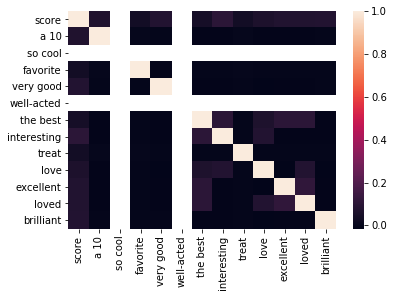

In [6]:
sns.heatmap(imdb_raw.corr())

In [7]:
data = imdb_raw.iloc[0:, 12:]
target = imdb_raw['score']

In [8]:
bnb = BernoulliNB()

bnb.fit(data, target)

y_pred = bnb.predict(data)

print("Out of a possible {} points, there are {} mislabeled points in this dataset.".format(
    data.shape[0],
    (target != y_pred).sum()
))

Out of a possible 747 points, there are 361 mislabeled points in this dataset.
